https://www.kaggle.com/muhammadimran112233/employees-evaluation-for-promotion

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


LOADING DATA

In [2]:
data=pd.read_csv("employee_promotion.csv")
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0


DATA DESCRIPTION

In [3]:
data.shape

(54808, 13)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won            54808 non-null  int64  
 11  avg_training_score    52248 non-null  float64
 12  is_promoted           54808 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 5.4+ MB


In [27]:
8+33+2+1+2+8-1

53

In [5]:
data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,52248.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.023172,63.712238,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.150450,13.521910,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,0.000000,77.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


DATA PREPROCESSING

In [6]:
data.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won                 0
avg_training_score      2560
is_promoted                0
dtype: int64

In [7]:
data['previous_year_rating'].fillna(data['previous_year_rating'].median(),inplace=True)
data['avg_training_score'].fillna(data['avg_training_score'].median(),inplace=True)
data['education'].fillna("Bachelor's",inplace=True)

In [8]:
data.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won              0
avg_training_score      0
is_promoted             0
dtype: int64

In [9]:
data.drop('employee_id',axis=1,inplace=True)

EXPLORATORY DATA ANALYSIS

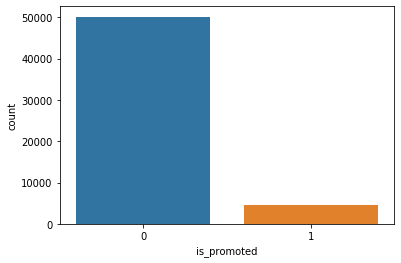

In [10]:
sns.countplot(x='is_promoted',data=data)

In [12]:
data['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

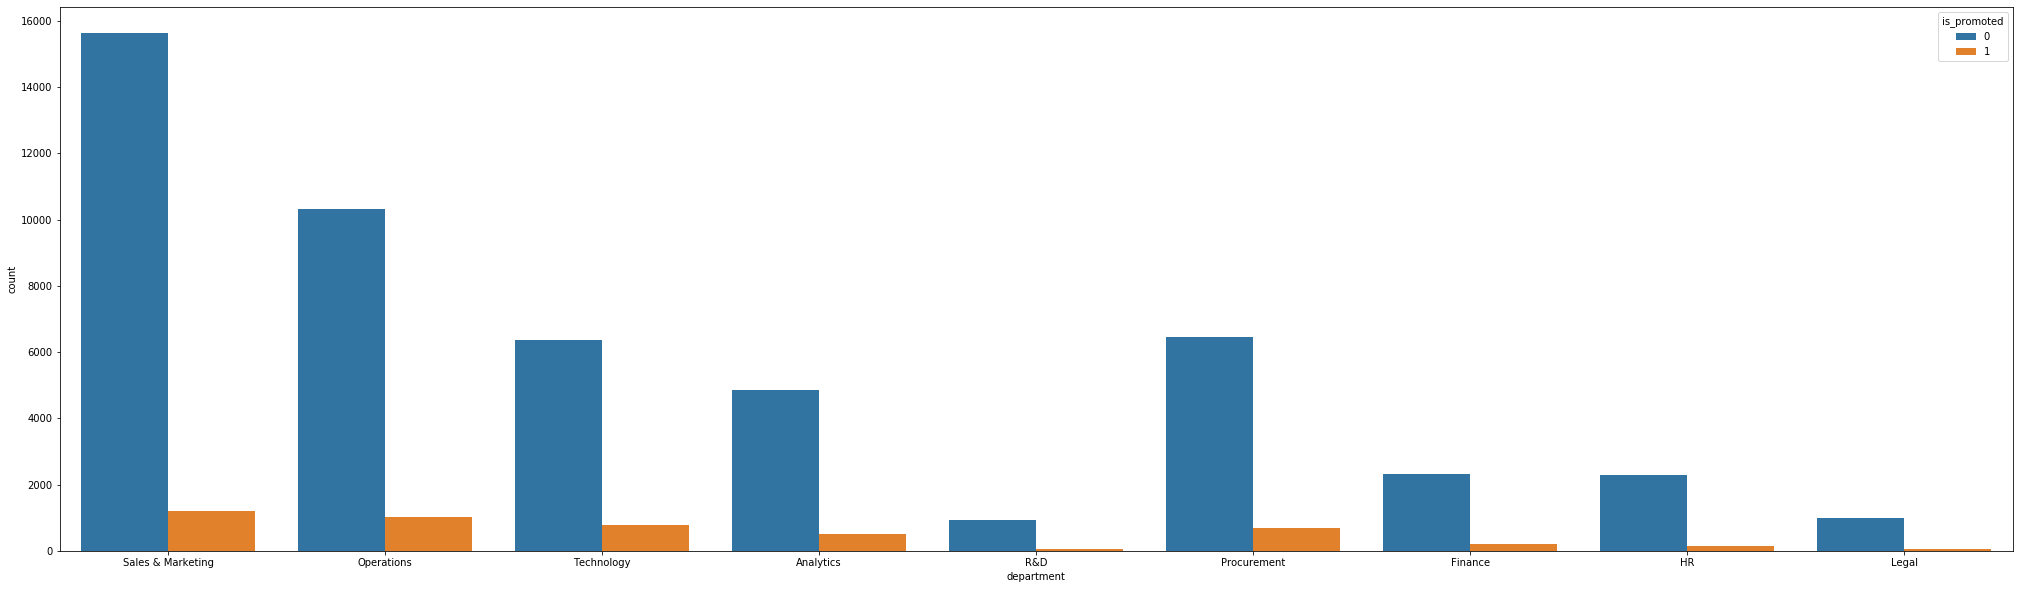

In [14]:
plt.figure(figsize=(35,10))
sns.countplot(x='department',hue='is_promoted',data=data)

In [25]:
len(data['region'].value_counts())

34

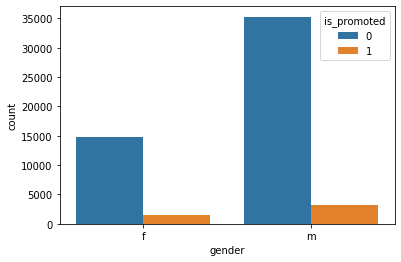

In [15]:
sns.countplot(x='gender',hue='is_promoted',data=data)

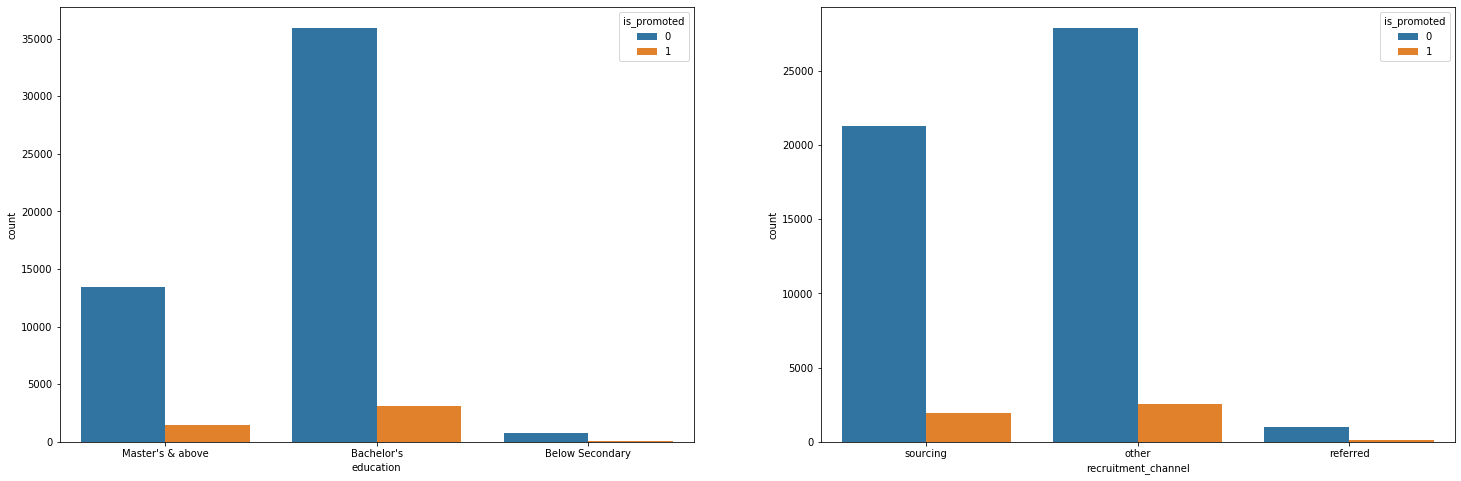

In [16]:
plt.figure(figsize=(25,8))
plt.subplot(1,2,1)
sns.countplot(x='education',hue='is_promoted',data=data)

plt.subplot(1,2,2)
sns.countplot(x='recruitment_channel',hue='is_promoted',data=data)

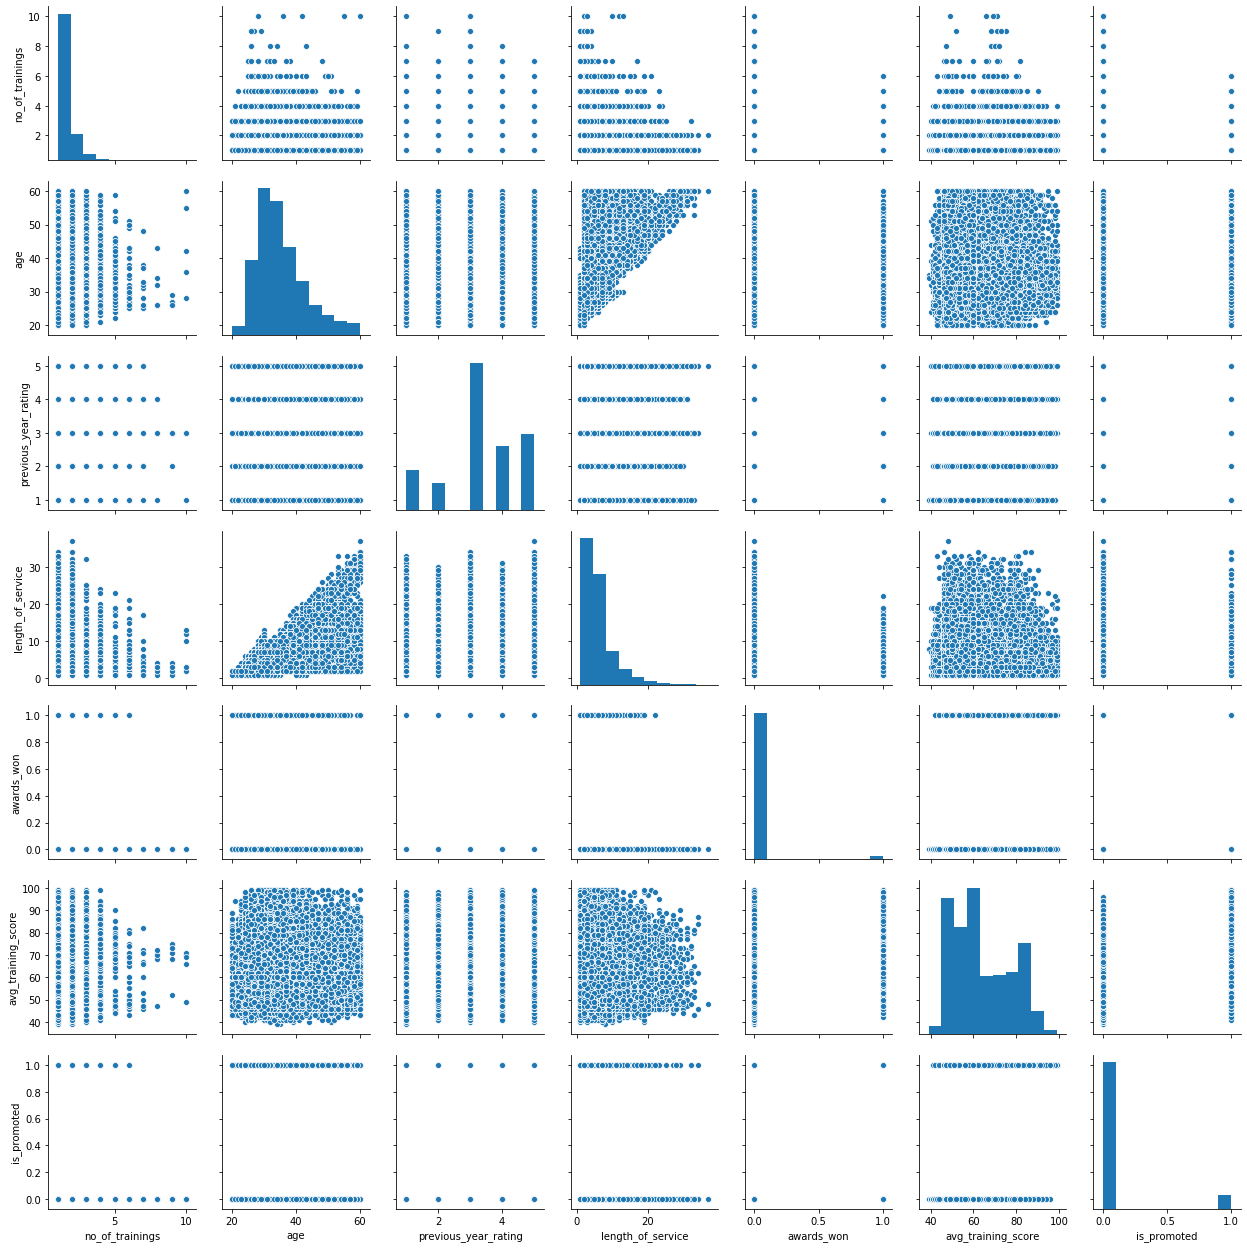

In [17]:
sns.pairplot(data)

In [18]:
data.groupby('is_promoted')['age'].mean()

is_promoted
0    34.844037
1    34.372965
Name: age, dtype: float64

In [19]:
data.groupby('is_promoted')['avg_training_score'].mean()

is_promoted
0    62.807579
1    71.393530
Name: avg_training_score, dtype: float64

In [20]:
data.groupby('is_promoted')['previous_year_rating'].mean()

is_promoted
0    3.247686
1    3.914524
Name: previous_year_rating, dtype: float64

In [21]:
cor=data.corr()
cor

,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
no_of_trainings,1.000000,-0.081278,-0.061564,-0.057275,-0.007628,0.044478,-0.024896
age,-0.081278,1.000000,0.026810,0.657111,-0.008169,-0.048809,-0.017166
previous_year_rating,-0.061564,0.026810,1.000000,0.023504,0.026587,0.069457,0.153230
length_of_service,-0.057275,0.657111,0.023504,1.000000,-0.039927,-0.038577,-0.010670
awards_won,-0.007628,-0.008169,0.026587,-0.039927,1.000000,0.073116,0.195871
avg_training_score,0.044478,-0.048809,0.069457,-0.038577,0.073116,1.000000,0.181214
is_promoted,-0.024896,-0.017166,0.153230,-0.010670,0.195871,0.181214,1.000000


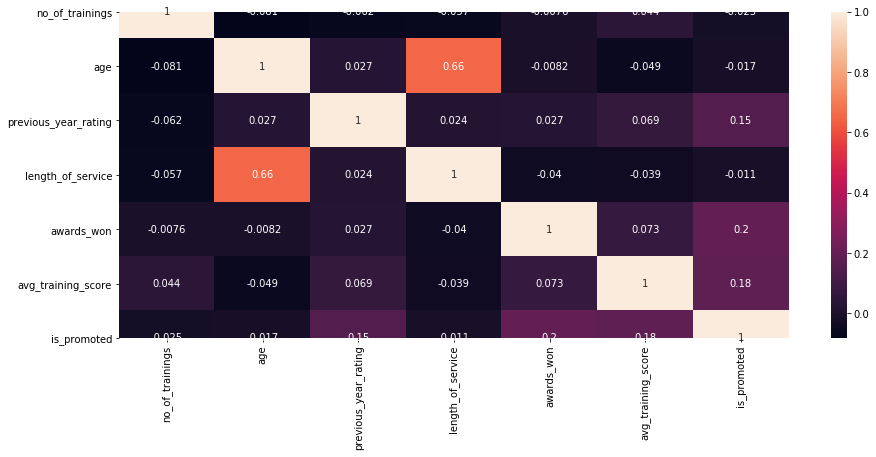

In [22]:
plt.figure(figsize=(15,6))
sns.heatmap(cor,annot=True)

In [28]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()

data=data.apply(le.fit_transform)
data.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,7,31,2,0,2,0,15,4,7,0,9,0
1,4,14,0,1,0,0,10,4,3,0,20,0
2,7,10,0,1,2,0,14,2,6,0,10,0
3,7,15,0,1,0,1,19,0,9,0,10,0
4,8,18,0,1,0,0,25,2,1,0,32,0


In [29]:
y=data['is_promoted']
X=data.drop('is_promoted',axis=1)

TRAIN-TEST SPLIT

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

MODELS AND ACCURACY

In [34]:
from sklearn.tree import DecisionTreeClassifier 
decision_obj=DecisionTreeClassifier(random_state=0)
decision_obj.fit(X_train, y_train)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [35]:
y_pred=decision_obj.predict(X_test)

In [36]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print("Confusin matrix:")
print(confusion_matrix(y_test,y_pred))
print("Classification report:")
print(classification_report(y_test,y_pred))
print("Accuracy score:")
print(accuracy_score(y_test,y_pred))

Confusin matrix:
[[13975  1135]
 [  814   519]]
Classification report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93     15110
           1       0.31      0.39      0.35      1333

    accuracy                           0.88     16443
   macro avg       0.63      0.66      0.64     16443
weighted avg       0.89      0.88      0.89     16443

Accuracy score:
0.8814693182509274


In [37]:
from sklearn.ensemble import RandomForestClassifier as rfc
random_obj=rfc(random_state=0)
random_obj.fit(X_train, y_train)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:489: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_store_unique_indices = np.zeros(y.shape, dtype=np.int)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silenc

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [38]:
y_pred1=random_obj.predict(X_test)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


In [39]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print("Confusin matrix:")
print(confusion_matrix(y_test,y_pred1))
print("Classification report:")
print(classification_report(y_test,y_pred1))
print("Accuracy score:")
print(accuracy_score(y_test,y_pred1))

Confusin matrix:
[[14976   134]
 [ 1013   320]]
Classification report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     15110
           1       0.70      0.24      0.36      1333

    accuracy                           0.93     16443
   macro avg       0.82      0.62      0.66     16443
weighted avg       0.92      0.93      0.91     16443

Accuracy score:
0.9302438727726084


In [41]:
from sklearn.ensemble import GradientBoostingClassifier
gra_obj=GradientBoostingClassifier(random_state=0)
gra_obj.fit(X_train,y_train)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1348: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.object)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1570: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sample_mask = np.ones((n_samples, ), dtype=np.bool)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1206: D

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1206: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1206: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\hp\Anacon

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1206: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1206: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\hp\Anacon

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1206: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1206: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\hp\Anacon

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1206: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1206: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\hp\Anacon

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1206: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1206: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\hp\Anacon

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [42]:
y_pred4=gra_obj.predict(X_test)

In [43]:
print("Confusin matrix:")
print(confusion_matrix(y_test,y_pred4))
print("Classification report:")
print(classification_report(y_test,y_pred4))
print("Accuracy score:")
print(accuracy_score(y_test,y_pred4))

Confusin matrix:
[[15082    28]
 [ 1003   330]]
Classification report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     15110
           1       0.92      0.25      0.39      1333

    accuracy                           0.94     16443
   macro avg       0.93      0.62      0.68     16443
weighted avg       0.94      0.94      0.92     16443

Accuracy score:
0.9372985464939488


In [44]:
gra_obj.predict([[4,10,1,1,2,1,25,2,6,0,10]])

array([0], dtype=int64)